In [28]:
from disentangle.data_loader.train_val_data import get_train_val_data
from disentangle.config_utils import load_config
from disentangle.scripts.evaluate import get_data_dir
from disentangle.core.data_split_type import DataSplitType
from disentangle.core.tiff_reader import save_tiff, load_tiff
import os

gt_root_dir = "/group/jug/ashesh/kth_data"
pred_rootdir = '/group/jug/ashesh/training/disentangle'
output_data_dir = '/group/jug/ashesh/naturemethods/four_splitting/'
KTH_SAMPLE = 3

def sample_subdir(k):
    return 'kth{}'.format(k)

def get_gt_dir(dtype):
    gt_dir = os.path.join(gt_root_dir, dtype)
    gt_dir = os.path.join(gt_dir, sample_subdir(KTH_SAMPLE))
    return gt_dir


def get_kth_gt(val_data):
    if hasattr(val_data, '_data'):
        gt_data = val_data._data[KTH_SAMPLE][0]
    else:
        gt_data = val_data[KTH_SAMPLE]
    return gt_data



full_frame_pred_dirs = {
'2406/D25-M3-S0-L8/12': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk8_F/kth_{KTH_SAMPLE}/pred_training_disentangle_2406_D25-M3-S0-L8_12_1.tif',
}




crops_pred_dirs = {
        # '2404/D21-M3-S0-L8/6':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D21-M3-S0-L8_6.pkl',
        # '2404/D25-M3-S0-L8/97':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_97.pkl',
        # '2404/D25-M3-S0-L8/120':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_120.pkl',
        # '2404/D25-M3-S0-L8/111':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_111.pkl',
        # '2404/D25-M3-S0-L8/125':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_125.pkl',
        # '2404/D25-M3-S0-L8/139':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_139.pkl',
        # '2404/D25-M3-S0-L8/143':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_143.pkl',
        # '2405/D18-M3-S0-L8/13':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_13.pkl',
        # '2405/D18-M3-S0-L8/14':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_14.pkl',
        # '2405/D18-M3-S0-L8/15':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_15.pkl',
        # '2405/D18-M3-S0-L8/10':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_10.pkl',
        # '2405/D18-M3-S0-L8/11':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_11.pkl',
        # '2405/D18-M3-S0-L8/12':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_12.pkl',
        # '2404/D17-M3-S0-L8/4':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D17-M3-S0-L8_4.pkl',
        # '2404/D21-M3-S0-L8/1':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D21-M3-S0-L8_1.pkl',
}

### Fetch the kth frame data and store it for fast access

In [29]:

for model_dir, pred_fpath in full_frame_pred_dirs.items():
    dtype = model_dir.split('/')[1].split('-')[0]
    gt_dir = get_gt_dir(dtype)

    if not os.path.exists(gt_dir):
        print('No such dir {}. Creating it'.format(gt_dir))
        os.makedirs(gt_dir, exist_ok=True)
    
    gt_fpath = os.path.join(gt_dir, 'gt_for_'+os.path.basename(pred_fpath))
    if not os.path.exists(gt_fpath):
        print('GT data is not present at {}. Creating it'.format(gt_fpath))
        # loading directory.
        config = load_config(os.path.join(pred_rootdir, model_dir, 'config.pkl'))
        val_data = get_train_val_data(config.data, get_data_dir(int(dtype[1:])), DataSplitType.Test, 
        val_fraction=config.training.val_fraction,
        test_fraction=config.training.test_fraction)
        kth_gt = get_kth_gt(val_data)
        save_tiff(gt_fpath, kth_gt)


In [30]:
# dtype = key.split('/')[1].split('-')[0]
# config = load_config(os.path.join(pred_rootdir, key, 'config.pkl'))
# val_data = get_train_val_data(config.data, get_data_dir(int(dtype[1:])), DataSplitType.Test, 
#         val_fraction=config.training.val_fraction,
#         test_fraction=config.training.test_fraction)
# kth_gt = get_kth_gt(val_data)

### Loading data

In [31]:
from disentangle.core.tiff_reader import load_tiff
from tqdm import tqdm

gt_pred_dict = {}
for model_dir, pred_fpath in tqdm(full_frame_pred_dirs.items()):
    dtype = model_dir.split('/')[1].split('-')[0]
    gt_dir = get_gt_dir(dtype)
    gt_fpath = os.path.join(gt_dir, 'gt_for_'+os.path.basename(pred_fpath))
    kth_gt = load_tiff(gt_fpath)
    kth_pred = load_tiff(pred_fpath)
    print(pred_fpath)
    gt_pred_dict[model_dir] = (kth_gt, kth_pred)


100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk8_F/kth_3/pred_training_disentangle_2406_D25-M3-S0-L8_12_1.tif


In [32]:
# https://www.notion.so/Evaluating-2-channel-results-281cea8bb51c47ccadd50a389614100f?pvs=4

keys = [
# '2405/D25-M3-S0-L8/2',
# '2405/D25-M3-S0-L8/3',
# '2405/D18-M3-S0-L8/16',
# "2406/D25-M3-S0-L8/4",
# "2406/D25-M3-S0-L8/5",
# "2406/D25-M3-S0-L8/6",
"2406/D25-M3-S0-L8/12",
]

2406/D25-M3-S0-L8/12


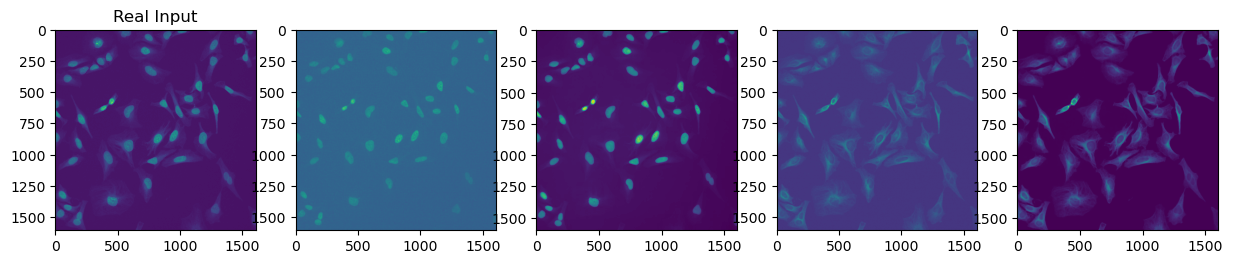

In [33]:
import matplotlib.pyplot as plt
import numpy as np
def get_input(gt):
    synthetic_input = None
    if gt.shape[-1] == 3:
        inp = gt.mean(axis=-1)
        synthetic_input = True
    else:
        assert gt.shape[-1] == 5, f'Expected 5 channels. Got {gt.shape[-1]} channels.'
        inp = gt[...,-1]
        synthetic_input = False
    return inp, synthetic_input


key = keys[-1]
print(key)
gt, pred = gt_pred_dict[key]
gt = gt.squeeze()
pred = pred.squeeze()
_,ax = plt.subplots(figsize=(15,3),ncols=5)
inp, is_syhthetic = get_input(gt)
if is_syhthetic:
    ax[0].set_title('Synthetic Input')
else:
    ax[0].set_title('Real Input')

ax[0].imshow(inp)   
ax[1].imshow(gt[...,0])
ax[2].imshow(pred[...,0])

ax[3].imshow(gt[...,1])
ax[4].imshow(pred[...,1])

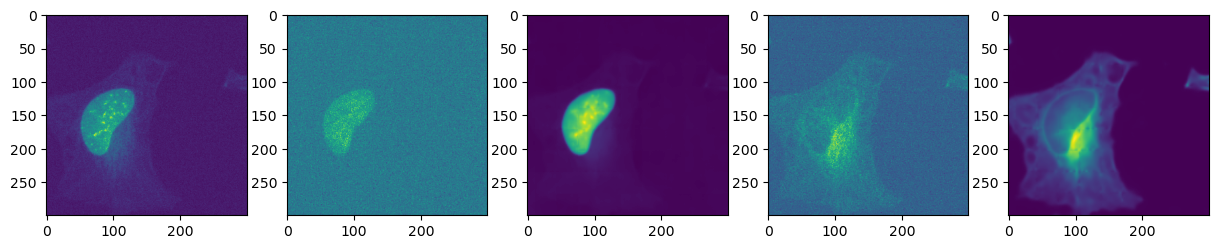

In [34]:
_,ax = plt.subplots(figsize=(15,3),ncols=5)
hs = 500
ws = 500
sz = 300
ax[0].imshow(inp[hs:hs+sz, ws:ws+sz])
ax[1].imshow(gt[hs:hs+sz, ws:ws+sz,0])
ax[2].imshow(pred[hs:hs+sz, ws:ws+sz,0])

ax[3].imshow(gt[hs:hs+sz, ws:ws+sz,1])
ax[4].imshow(pred[hs:hs+sz, ws:ws+sz,1])

In [35]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pandas as pd

# 5x10 grid for the input. 2x10 grid for the two targets and predictions.


def get_cropped_img(inp, hfac, hs=None, ws= None, wN=None, extra_h=0, extra_w=0):
    if wN is None:
        wN = inp.shape[1]
    
    if ws is None:
        ws = (inp.shape[1] - wN)//2
    else:
        assert ws + wN < inp.shape[1], f'Invalid ws for the input. ws = {ws}, wN = {wN}, inp.shape = {inp.shape}'
    
    hN = int(wN*hfac)
    if hs is None:
        hs = (inp.shape[0] - hN)//2
    else:
        assert hs + hN < inp.shape[0], f'Invalid hs for the input. hs = {hs}, hN = {hN}, inp.shape = {inp.shape}'
    
    coords = (hs-extra_h//2, ws-extra_w//2, hN+extra_h//2, wN+extra_w//2)
    return inp[hs-extra_h//2:hs+hN+extra_h//2, ws - extra_w//2:ws+wN+extra_w//2], coords


def find_most_interesting_box(inp_crop, channel_h_factor):
    """
    Returns hs, the start of the box
    """
    boxH = int(np.ceil(channel_h_factor * inp_crop.shape[0]))
    idx = np.argmax(pd.Series(inp_crop.std(axis=1)).rolling(window=boxH).mean().iloc[boxH:].values)
    return idx
# key = keys[0]
# input_h_factor = 0.5 # we want to make rectangula
# channel_h_factor = 0.48
# unit_size = 6
# ncols = 3
# nrows = 1
# grid_factor = 50
# wN = 1500
# ws = 1500

# fig = plt.figure(figsize=(ncols*unit_size,int(nrows*unit_size*input_h_factor)))

# gs = gridspec.GridSpec(int(nrows*grid_factor), ncols*grid_factor, figure=fig, wspace=0.0, hspace=0.0)

# gt, pred = gt_pred_dict[key]
# gt = gt.squeeze()
# pred = pred.squeeze()
# inp = get_input(gt)[0]

# channel_g_rows = int(grid_factor*channel_h_factor)
# channel_g_cols = grid_factor

# # input 
# col_s = 0
# col_e = grid_factor
# row_s = 0
# row_e = int(grid_factor)

# ax_inp = fig.add_subplot(gs[row_s:row_e, col_s:col_e])
# inp_crop, input_coordinates = get_cropped_img(inp, input_h_factor, wN=wN, ws=ws)
# ax_inp.imshow(inp_crop, cmap='magma')
# ax_inp.axis('off')

# # two targets
# col_s = col_e
# col_e = col_s + channel_g_cols
# row1_s = 0
# row1_e = channel_g_rows
# ax_tar1 = fig.add_subplot(gs[row1_s:row1_e, col_s:col_e])
# tar1_crop, ch_cordinates = get_cropped_img(gt[...,0], channel_h_factor*input_h_factor,  wN=wN, ws=ws)
# relative_coordinates = (ch_cordinates[0] - input_coordinates[0],
#                         ch_cordinates[1] - input_coordinates[1],
#                         ch_cordinates[2],
#                         ch_cordinates[3])
# rect = patches.Rectangle((relative_coordinates[1], relative_coordinates[0]), relative_coordinates[3],relative_coordinates[2], 
#                          linewidth=1, edgecolor='w', facecolor='none', linestyle='--')
# ax_inp.add_patch(rect)

# ax_tar1.imshow(tar1_crop, cmap='magma')
# ax_tar1.axis('off')

# row2_e = grid_factor
# row2_s = row2_e - channel_g_rows
# ax_tar2 = fig.add_subplot(gs[row2_s:row2_e, col_s:col_e])
# ax_tar2.imshow(get_cropped_img(gt[...,1], channel_h_factor*input_h_factor,  wN=wN, ws=ws)[0], cmap='magma')
# ax_tar2.axis('off')


# # two predictions
# col_s = col_e
# col_e = col_s + channel_g_cols
# ax_pred1 = fig.add_subplot(gs[row1_s:row1_e, col_s:col_e])
# ax_pred1.imshow(get_cropped_img(pred[...,0], channel_h_factor*input_h_factor,  wN=wN, ws=ws)[0], cmap='magma')
# ax_pred1.axis('off')

# ax_pred2 = fig.add_subplot(gs[row2_s:row2_e, col_s:col_e])
# ax_pred2.imshow(get_cropped_img(pred[...,1], channel_h_factor*input_h_factor,  wN=wN, ws=ws)[0], cmap='magma')
# ax_pred2.axis('off')


140, 305
/group/jug/ashesh/naturemethods/four_splitting/cropped_2406_D25-M3-S0-L8_12_K3_558-140-144-800.png


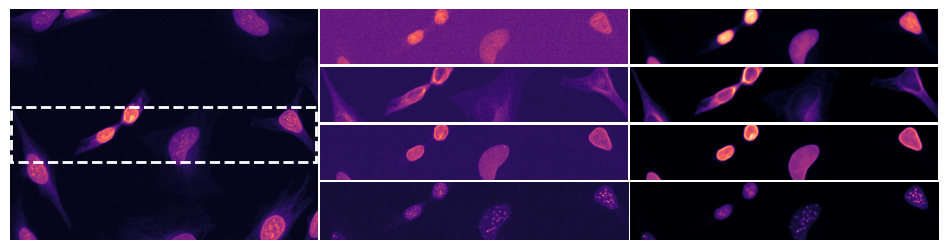

In [66]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# 5x10 grid for the input. 2x10 grid for the two targets and predictions.

key = keys[0]
input_h_factor = 0.75 # we want to make rectangula
channel_h_factor = 0.24
unit_size = 4
ncols = 4
nrows = 1
grid_factor = 300
wN = 800
savefig = True

if savefig is False:
    ws = np.random.randint(0, gt_pred_dict[key][0].shape[0] -wN)
    hs = np.random.randint(0, gt_pred_dict[key][0].shape[1] -int(wN/input_h_factor))
# ws, hs = 524, 386

# 293, 118

print(f"{ws}, {hs}")




fig = plt.figure(figsize=(ncols*unit_size,int(nrows*unit_size*input_h_factor)))
gs = gridspec.GridSpec(int(nrows*grid_factor), ncols*grid_factor, figure=fig, wspace=0.0, hspace=0.1)

gt, pred = gt_pred_dict[key]
gt = gt.squeeze()
pred = pred.squeeze()
inp = get_input(gt)[0]

channel_g_rows = int(grid_factor*channel_h_factor)
channel_g_cols = grid_factor

# input 
col_s = 0
col_e = grid_factor
row_s = 0
row_e = int(grid_factor)

ax_inp = fig.add_subplot(gs[row_s:row_e, col_s:col_e])
inp_crop, input_coordinates = get_cropped_img(inp, input_h_factor, wN=wN, ws=ws, hs=hs)
ax_inp.imshow(inp_crop, cmap='magma')
ax_inp.axis('off')

# three targets
# tar 1
col_s = col_e
col_e = col_s + channel_g_cols
row1_s = 0
row1_e = channel_g_rows
ax_tar1 = fig.add_subplot(gs[row1_s:row1_e, col_s:col_e])
# find the most interesting box in the inp_crop
hs_tar = hs + find_most_interesting_box(inp_crop, channel_h_factor)

tar1_crop, ch_cordinates = get_cropped_img(gt[...,0], channel_h_factor*input_h_factor,  wN=wN, ws=ws,hs=hs_tar)
ax_tar1.imshow(tar1_crop, cmap='magma')
ax_tar1.axis('off')
relative_coordinates = (ch_cordinates[0] - input_coordinates[0],
                        ch_cordinates[1] - input_coordinates[1],
                        ch_cordinates[2],
                        ch_cordinates[3])
rect = patches.Rectangle((relative_coordinates[1]+3, relative_coordinates[0]), relative_coordinates[3]-9,relative_coordinates[2], 
                         linewidth=2, edgecolor='w', facecolor='none', linestyle='--')
ax_inp.add_patch(rect)

# tar 2
row_offset= 3
row2_s = channel_g_rows + row_offset
row2_e = 2*channel_g_rows + row_offset
ax_tar2 = fig.add_subplot(gs[row2_s:row2_e, col_s:col_e])
ax_tar2.imshow(get_cropped_img(gt[...,1], channel_h_factor*input_h_factor,  wN=wN, ws=ws,hs=hs_tar)[0], cmap='magma')
ax_tar2.axis('off')

# tar 3
row3_s = 2*channel_g_rows + 2*row_offset
row3_e = 3*channel_g_rows + 2*row_offset
ax_tar3 = fig.add_subplot(gs[row3_s:row3_e, col_s:col_e])
ax_tar3.imshow(get_cropped_img(gt[...,2], channel_h_factor*input_h_factor,  wN=wN, ws=ws,hs=hs_tar)[0], cmap='magma')
ax_tar3.axis('off')

# tar 4
extra_h = 0
extra_w = -30
row4_s = 3*channel_g_rows + 3*row_offset
row4_e = grid_factor
ax_tar4 = fig.add_subplot(gs[row4_s:row4_e, col_s:col_e])
ax_tar4.imshow(get_cropped_img(gt[...,3], channel_h_factor*input_h_factor,  wN=wN, ws=ws,hs=hs_tar, extra_h=extra_h, extra_w=extra_w)[0], cmap='magma')
ax_tar4.axis('off')


# three predictions
col_s = col_e
col_e = col_s + channel_g_cols
ax_pred1 = fig.add_subplot(gs[row1_s:row1_e, col_s:col_e])
ax_pred1.imshow(get_cropped_img(pred[...,0], channel_h_factor*input_h_factor,  wN=wN, ws=ws,hs=hs_tar)[0], cmap='magma')
ax_pred1.axis('off')

ax_pred2 = fig.add_subplot(gs[row2_s:row2_e, col_s:col_e])
ax_pred2.imshow(get_cropped_img(pred[...,1], channel_h_factor*input_h_factor,  wN=wN, ws=ws,hs=hs_tar)[0], cmap='magma')
ax_pred2.axis('off')

ax_pred3 = fig.add_subplot(gs[row3_s:row3_e, col_s:col_e])
ax_pred3.imshow(get_cropped_img(pred[...,2], channel_h_factor*input_h_factor,  wN=wN, ws=ws,hs=hs_tar)[0], cmap='magma')
ax_pred3.axis('off')

ax_pred4 = fig.add_subplot(gs[row4_s:row4_e, col_s:col_e])
ax_pred4.imshow(get_cropped_img(pred[...,3], channel_h_factor*input_h_factor,  wN=wN, ws=ws,hs=hs_tar, extra_h=extra_h,extra_w=extra_w)[0], cmap='magma')
ax_pred4.axis('off')

if savefig:
    # filename should contain all cropping information
    fname = 'cropped_{}_K{}_{}-{}-{}-{}.png'.format(key.replace('/','_'),KTH_SAMPLE, ch_cordinates[0], ch_cordinates[1], ch_cordinates[2], ch_cordinates[3])
    fpath = os.path.join(output_data_dir, fname)
    print(fpath)
    plt.savefig(fpath, dpi=200, bbox_inches='tight')